<a href="https://colab.research.google.com/github/NHoangThanh/AI-assignment/blob/main/FinalProject_TRAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils import img_to_array, load_img
from keras.utils import to_categorical, plot_model
from keras.models import Sequential, Model
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D, LeakyReLU
from keras.layers import Activation, Flatten, Dropout, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.utils import validation

import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from numpy import asarray, save


In [2]:
folder = 'drive/MyDrive/face/'
datas, labels = list(), list()
for file in listdir(folder):
  if file.startswith('Man_'):
    output = 0
  if file.startswith('Woman_'):
    output = 1
  data = load_img(folder+file, target_size=(96,96))
  data = img_to_array(data)
  datas.append(data)
  labels.append(output)

data_train = asarray(datas)
label_train = asarray(labels)
print(data_train.shape, label_train.shape)

(2307, 96, 96, 3) (2307,)


In [3]:
folder = 'drive/MyDrive/test/'
datas, labels = list(), list()
for file in listdir(folder):
  if file.startswith('Man_'):
    output = 0
  if file.startswith('Woman_'):
    output = 1
  data = load_img(folder+file, target_size=(96,96))
  data = img_to_array(data)
  datas.append(data)
  labels.append(output)

data_test = asarray(datas)
label_test = asarray(labels)
print(data_test.shape, label_test.shape)

(500, 96, 96, 3) (500,)


In [4]:
data_train = data_train.reshape(2307, 96, 96, 3)
data_train = data_train.astype('float32')/255
data_test = data_test.reshape(500,96,96,3)
data_test = data_test.astype('float32')/255

label_train = to_categorical(label_train)
label_test = to_categorical(label_test)

print(data_train.shape, label_train.shape, data_test.shape, label_test.shape)

(2307, 96, 96, 3) (2307, 2) (500, 96, 96, 3) (500, 2)


In [5]:
model = Sequential()

model.add(Conv2D(32, (3,3), 
                 activation='linear', padding="same", input_shape=(96,96,3)))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((3,3), padding = 'same'))

model.add(Conv2D(64, (3,3), 
                 activation='linear', padding="same"))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((3,3), padding = 'same'))

model.add(Conv2D(64, (3,3), 
                 activation='linear', padding="same"))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, (3,3), activation ='linear', padding="same"))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, (3,3), activation='linear', padding="same"))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation("softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 96, 96, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                    

In [6]:
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

train = model.fit(data_train, label_train, batch_size = 64, epochs= 100, verbose=1)
test_loss, test_acc = model.evaluate(data_test, label_test)
print('do chinh xac', test_acc)
print('ham mat mat', test_loss)

Epoch 1/100
37/37 [==============================] - 11s 22ms/step - loss: 0.6382 - accuracy: 0.6142
Epoch 2/100
37/37 [==============================] - 1s 17ms/step - loss: 0.3949 - accuracy: 0.8179
Epoch 3/100
37/37 [==============================] - 1s 16ms/step - loss: 0.2920 - accuracy: 0.8739
Epoch 4/100
37/37 [==============================] - 1s 17ms/step - loss: 0.2317 - accuracy: 0.9072
Epoch 5/100
37/37 [==============================] - 1s 17ms/step - loss: 0.1633 - accuracy: 0.9367
Epoch 6/100
37/37 [==============================] - 1s 17ms/step - loss: 0.1007 - accuracy: 0.9619
Epoch 7/100
37/37 [==============================] - 1s 17ms/step - loss: 0.0717 - accuracy: 0.9723
Epoch 8/100
37/37 [==============================] - 1s 16ms/step - loss: 0.0722 - accuracy: 0.9740
Epoch 9/100
37/37 [==============================] - 1s 15ms/step - loss: 0.0324 - accuracy: 0.9883
Epoch 10/100
37/37 [==============================] - 1s 16ms/step - loss: 0.0224 - accuracy: 0.992

In [12]:
model.save('drive/MyDrive/face_detection.h5')

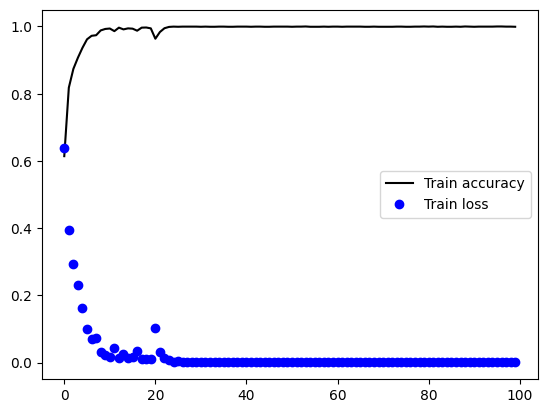

In [11]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'k', label = 'Train accuracy')
plt.plot(epochs, loss, 'bo', label = 'Train loss')
plt.legend(['Train accuracy', 'Train loss'])
plt.show()